In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV

from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,matthews_corrcoef


# from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
df = pd.read_csv('../Feature Engineering/EPL_Final_cleaned_features.csv')
df.head(5)

,Temperature,Humidity,WindDirection,Precipitation,WindSpeed,Home_Prv_FTR,Home_Prv_FTHG,Home_Prv_HS,Home_Prv_HST,Home_Prv_HF,...,WeatherCode_Clear,WeatherCode_Clouds,WeatherCode_Drizzle,WeatherCode_Fog,WeatherCode_Haze,WeatherCode_Mist,WeatherCode_Rain,WeatherCode_Snow,Time_of_Day_Afternoon,Time_of_Day_Evening
0,1.520994,-0.945689,0.186303,-0.36088,1.697256,0.0,1.0,14.0,3.0,10.0,...,0,1,0,0,0,0,0,0,1,0
1,1.843288,-0.812861,0.509638,-0.36088,1.297697,0.0,1.0,14.0,5.0,9.0,...,1,0,0,0,0,0,0,0,1,0
2,1.739561,-0.680033,0.509638,-0.36088,0.571225,0.0,0.0,6.0,2.0,16.0,...,0,0,0,0,0,0,1,0,1,0
3,1.335768,-0.414377,0.822195,-0.36088,0.284269,0.0,0.0,15.0,1.0,3.0,...,0,1,0,0,0,0,0,0,1,0
4,0.963463,-0.015893,0.940751,-0.36088,1.297697,0.0,2.0,30.0,10.0,14.0,...,0,1,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 41 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                1099 non-null   float64
 1   Humidity                   1099 non-null   float64
 2   WindDirection              1099 non-null   float64
 3   Precipitation              1099 non-null   float64
 4   WindSpeed                  1099 non-null   float64
 5   Home_Prv_FTR               1099 non-null   float64
 6   Home_Prv_FTHG              1099 non-null   float64
 7   Home_Prv_HS                1099 non-null   float64
 8   Home_Prv_HST               1099 non-null   float64
 9   Home_Prv_HF                1099 non-null   float64
 10  Home_Prv_HC                1099 non-null   float64
 11  Home_Prv_HY                1099 non-null   float64
 12  Home_Prv_HR                1099 non-null   float64
 13  Home_Prv_3_FTHG            1099 non-null   float

In [4]:
train_data = df[df['season'].isin(['2019-2020', '2020-2021'])]
test_data = df[df['season'] == '2021-2022']

### Model with Weather Data:

In [73]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 37), (722,), (377, 37), (377,))

In [74]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [75]:
# Reshape the data for CNN (CNN expects 3D input: samples, timesteps, features)
X_train_scaled = np.expand_dims(X_train, axis=2)
X_test_scaled = np.expand_dims(X_test, axis=2)

# # Convert target variable into integer encoding (assuming 'FTR' has categorical values)
# y_train = pd.get_dummies(y_train).values
# y_test = pd.get_dummies(y_test).values

In [48]:
X_train_scaled.shape

(722, 37, 1)

Epoch 1/100


d:\Program Files\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5881 - loss: 0.6745 - val_accuracy: 0.5225 - val_loss: 0.7009
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5802 - loss: 0.6603 - val_accuracy: 0.5305 - val_loss: 0.7065
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6732 - loss: 0.6220 - val_accuracy: 0.5305 - val_loss: 0.7157
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6779 - loss: 0.6115 - val_accuracy: 0.5279 - val_loss: 0.7365
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6646 - loss: 0.5989 - val_accuracy: 0.5464 - val_loss: 0.7470
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7149 - loss: 0.5525 - val_accuracy: 0.5305 - val_loss: 0.7542
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7048 - loss: 0.5725 - val_accuracy: 0.5464 - val_loss: 0.7808
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7158 - loss: 0.5492 - val_accuracy: 0.5623 - val_loss: 0.8

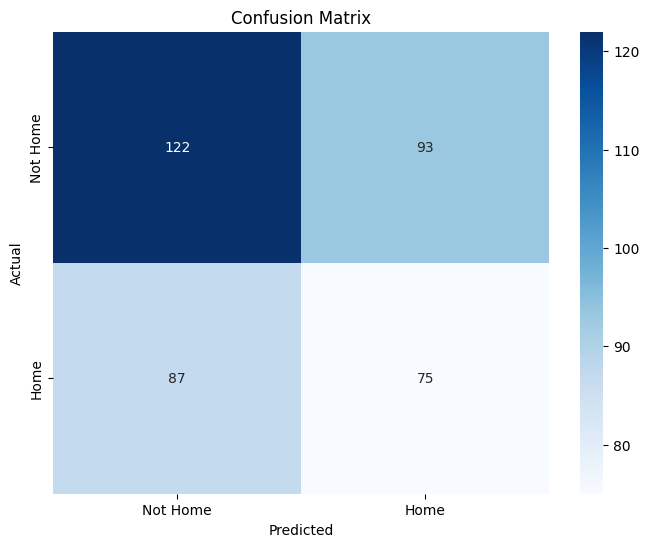

MCC: 0.03028247999268182
accuracy: 0.5225464190981433
              precision    recall  f1-score   support

           0       0.58      0.57      0.58       215
           1       0.45      0.46      0.45       162

    accuracy                           0.52       377
   macro avg       0.52      0.52      0.52       377
weighted avg       0.52      0.52      0.52       377



In [80]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Evaluate the model and generate predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")




# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)

### Model without Weather Data:

In [81]:
# Splitting into features and target variable
X_train = train_data.drop(columns=['FTR','Date', 'Time', 'season','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_train = train_data['FTR']
X_test = test_data.drop(columns=['FTR','Date', 'Time', 'season','Temperature', 'Humidity', 'WindDirection', 'Precipitation', 'WindSpeed', 
                                   'WeatherCode_Clear', 'WeatherCode_Clouds', 'WeatherCode_Drizzle', 'WeatherCode_Fog', 'WeatherCode_Haze', 'WeatherCode_Mist', 'WeatherCode_Rain', 'WeatherCode_Snow'])
y_test = test_data['FTR']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((722, 24), (722,), (377, 24), (377,))

In [82]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [83]:
# Reshape the data for CNN (CNN expects 3D input: samples, timesteps, features)
X_train_scaled = np.expand_dims(X_train, axis=2)
X_test_scaled = np.expand_dims(X_test, axis=2)

# Convert target variable into integer encoding (assuming 'FTR' has categorical values)
# y_train = pd.get_dummies(y_train).values
# y_test = pd.get_dummies(y_test).values

Epoch 1/100


d:\Program Files\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5507 - loss: 0.6836 - val_accuracy: 0.5676 - val_loss: 0.6942
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6361 - loss: 0.6379 - val_accuracy: 0.5252 - val_loss: 0.7013
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6253 - loss: 0.6388 - val_accuracy: 0.5411 - val_loss: 0.7075
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6147 - loss: 0.6402 - val_accuracy: 0.5729 - val_loss: 0.6924
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7009 - loss: 0.6007 - val_accuracy: 0.5836 - val_loss: 0.7120
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6906 - loss: 0.5924 - val_accuracy: 0.5915 - val_loss: 0.7188
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7473 - loss: 0.5567 - val_accuracy: 0.5650 - val_loss: 0.7233
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7290 - loss: 0.5509 - val_accuracy: 0.5676 - val_loss: 0.7

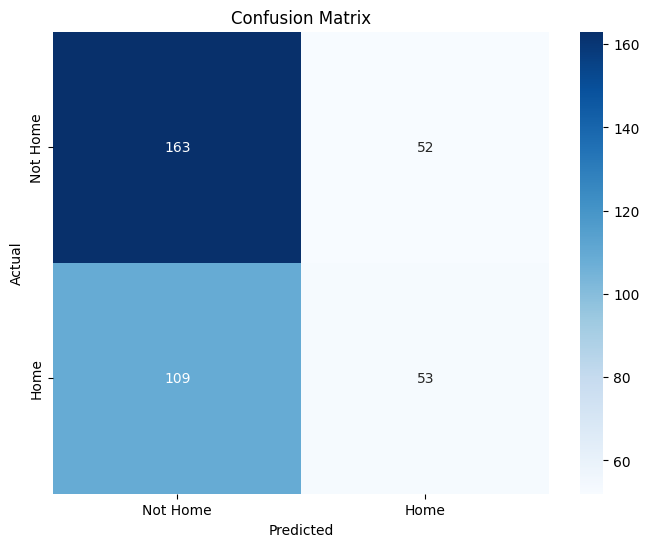

MCC: 0.09419911291859846
accuracy: 0.5729442970822282
              precision    recall  f1-score   support

           0       0.60      0.76      0.67       215
           1       0.50      0.33      0.40       162

    accuracy                           0.57       377
   macro avg       0.55      0.54      0.53       377
weighted avg       0.56      0.57      0.55       377



In [84]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

# Evaluate the model and generate predictions
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")



# Calculate accuracy and classification report
mcc = matthews_corrcoef(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Home', 'Home'], yticklabels=['Not Home', 'Home'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'MCC: {mcc}')
print(f'accuracy: {accuracy}')
print(classification_report_output)